In [1]:
import FdsPy.qe.myqengine as qe

univ = qe.IdUniverse(['DUMMY'])
ts = qe.TimeSeries(start_date = '20051230',end_date = '0',frequency='D',calendar = 'NAY')

data_dict = {"us_1y_yld":'SPEC_ID_DATA("TRYUS1Y-FDS:FG_YIELD",#DATE,#DATE,D,NONE,NONE,2)',
 "us_2y_yld":'SPEC_ID_DATA("TRYUS2Y-FDS:FG_YIELD",#DATE,#DATE,D,NONE,NONE,2)',
 "us_3y_yld":'SPEC_ID_DATA("TRYUS3Y-FDS:FG_YIELD",#DATE,#DATE,D,NONE,NONE,2)',
 "us_5y_yld":'SPEC_ID_DATA("TRYUS5Y-FDS:FG_YIELD",#DATE,#DATE,D,NONE,NONE,2)',
 "us_7y_yld":'SPEC_ID_DATA("TRYUS7Y-FDS:FG_YIELD",#DATE,#DATE,D,NONE,NONE,2)',
 "us_10y_yld":'SPEC_ID_DATA("TRYUS10Y-FDS:FG_YIELD",#DATE,#DATE,D,NONE,NONE,2)',
 "us_30y_yld":'SPEC_ID_DATA("TRYUS30Y-FDS:FG_YIELD",#DATE,#DATE,D,NONE,NONE,2)',
 "us_20y_yld":'SPEC_ID_DATA("TRYUS20Y-FDS:FG_YIELD",#DATE,#DATE,D,NONE,NONE,2)',
 "us_1M_yld":'SPEC_ID_DATA("TRYUS1M-FDS:FG_YIELD",#DATE,#DATE,D,NONE,NONE,2)',
 "us_3M_yld":'SPEC_ID_DATA("TRYUS3M-FDS:FG_YIELD",#DATE,#DATE,D,NONE,NONE,2)',
 "us_6M_yld":'SPEC_ID_DATA("TRYUS6M-FDS:FG_YIELD",#DATE,#DATE,D,NONE,NONE,2)',}

req = qe.Calculation(universe = univ,dates =ts,data_dict=data_dict,source = 'FqlExpression')

req.query()

req.data

,DATE,UNIVERSE,us_1y_yld,us_2y_yld,us_3y_yld,us_5y_yld,us_7y_yld,us_10y_yld,us_30y_yld,us_20y_yld,us_1M_yld,us_3M_yld,us_6M_yld
0,20051230,DUMMY,4.3800,4.4010,4.3700,4.3500,4.3600,4.3900,4.5100,NaN,3.9400,4.0800,4.2200
1,20060104,DUMMY,4.3500,4.3080,4.2800,4.2800,4.3100,4.3600,4.5500,NaN,3.9600,4.1900,4.2200
2,20060103,DUMMY,4.3800,4.3290,4.3000,4.3000,4.3200,4.3700,4.5200,NaN,3.9700,4.1600,4.2500
3,20060105,DUMMY,4.3600,4.3200,4.2900,4.2900,4.3100,4.3600,4.5100,NaN,3.9700,4.2000,4.2200
4,20060111,DUMMY,4.4400,4.4280,4.3900,4.3900,4.4100,4.4600,4.6100,NaN,4.0800,4.3000,4.2900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4479,20231019,DUMMY,5.4424,5.1610,5.0037,4.9613,5.0109,4.9855,5.1059,5.3367,5.4006,5.4738,5.5439
4480,20231016,DUMMY,5.4189,5.0967,4.8603,4.7157,4.7339,4.7101,4.8604,5.0741,5.4184,5.4940,5.5495
4481,20231024,DUMMY,5.4340,5.0885,4.8988,4.8150,4.8457,4.8198,4.9353,5.1526,5.3945,5.4552,5.5590
4482,20231020,DUMMY,5.4068,5.0799,4.9127,4.8528,4.9295,4.9201,5.0819,5.2896,5.3961,5.4583,5.5227


In [2]:
import pandas as pd
#df = pd.read_pickle('../../data/misc/daily_yields_20230920.pkl')

In [4]:
#df = req.data
df=req.data
df = df.drop(columns = ['UNIVERSE'])
df=df.set_index('DATE')

<Axes: xlabel='DATE'>

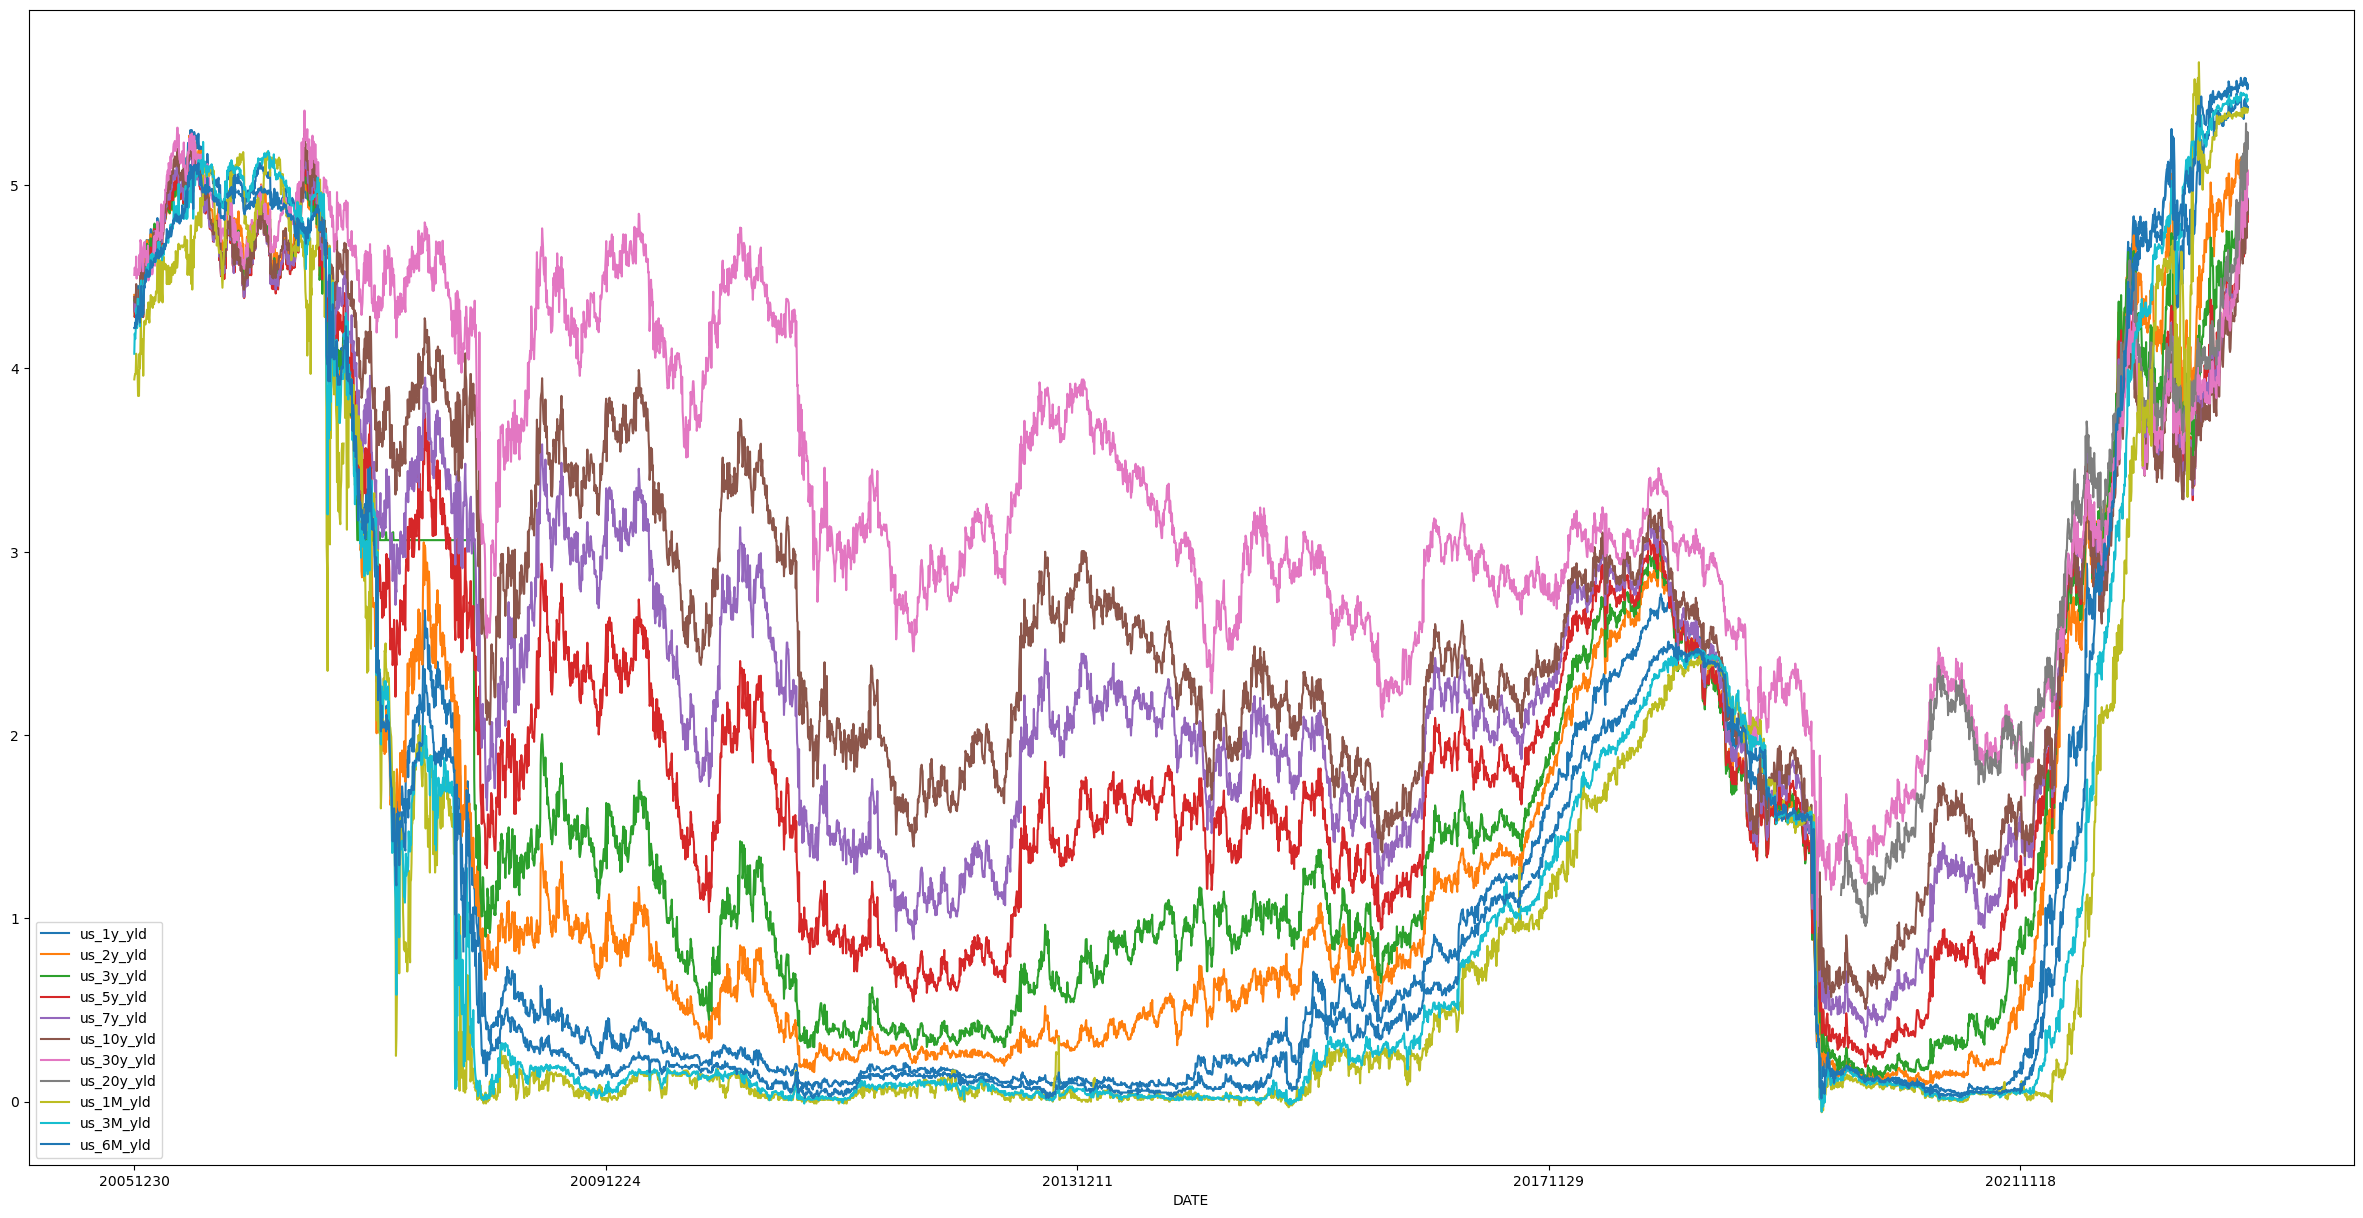

In [5]:
df.plot(figsize = (30,15))

In [6]:
df['Short Term (1m-6m)'] = df[['us_1M_yld','us_3M_yld','us_6M_yld']].mean(axis=1)
df['Short-Medium Term (1y-3y)'] = df[['us_1y_yld','us_2y_yld','us_3y_yld']].mean(axis=1)
df['Medium-Long Term (5y-10y)'] = df[['us_5y_yld','us_7y_yld','us_10y_yld']].mean(axis=1)
df['Long Term (10y-30y)'] = df[['us_10y_yld','us_20y_yld','us_30y_yld']].mean(axis=1)
df

,us_1y_yld,us_2y_yld,us_3y_yld,us_5y_yld,us_7y_yld,us_10y_yld,us_30y_yld,us_20y_yld,us_1M_yld,us_3M_yld,us_6M_yld,Short Term (1m-6m),Short-Medium Term (1y-3y),Medium-Long Term (5y-10y),Long Term (10y-30y)
DATE,,,,,,,,,,,,,,,
20051230,4.3800,4.4010,4.3700,4.3500,4.3600,4.3900,4.5100,NaN,3.9400,4.0800,4.2200,4.080000,4.383667,4.366667,4.450000
20060104,4.3500,4.3080,4.2800,4.2800,4.3100,4.3600,4.5500,NaN,3.9600,4.1900,4.2200,4.123333,4.312667,4.316667,4.455000
20060103,4.3800,4.3290,4.3000,4.3000,4.3200,4.3700,4.5200,NaN,3.9700,4.1600,4.2500,4.126667,4.336333,4.330000,4.445000
20060105,4.3600,4.3200,4.2900,4.2900,4.3100,4.3600,4.5100,NaN,3.9700,4.2000,4.2200,4.130000,4.323333,4.320000,4.435000
20060111,4.4400,4.4280,4.3900,4.3900,4.4100,4.4600,4.6100,NaN,4.0800,4.3000,4.2900,4.223333,4.419333,4.420000,4.535000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20231019,5.4424,5.1610,5.0037,4.9613,5.0109,4.9855,5.1059,5.3367,5.4006,5.4738,5.5439,5.472767,5.202367,4.985900,5.142700
20231016,5.4189,5.0967,4.8603,4.7157,4.7339,4.7101,4.8604,5.0741,5.4184,5.4940,5.5495,5.487300,5.125300,4.719900,4.881533
20231024,5.4340,5.0885,4.8988,4.8150,4.8457,4.8198,4.9353,5.1526,5.3945,5.4552,5.5590,5.469567,5.140433,4.826833,4.969233


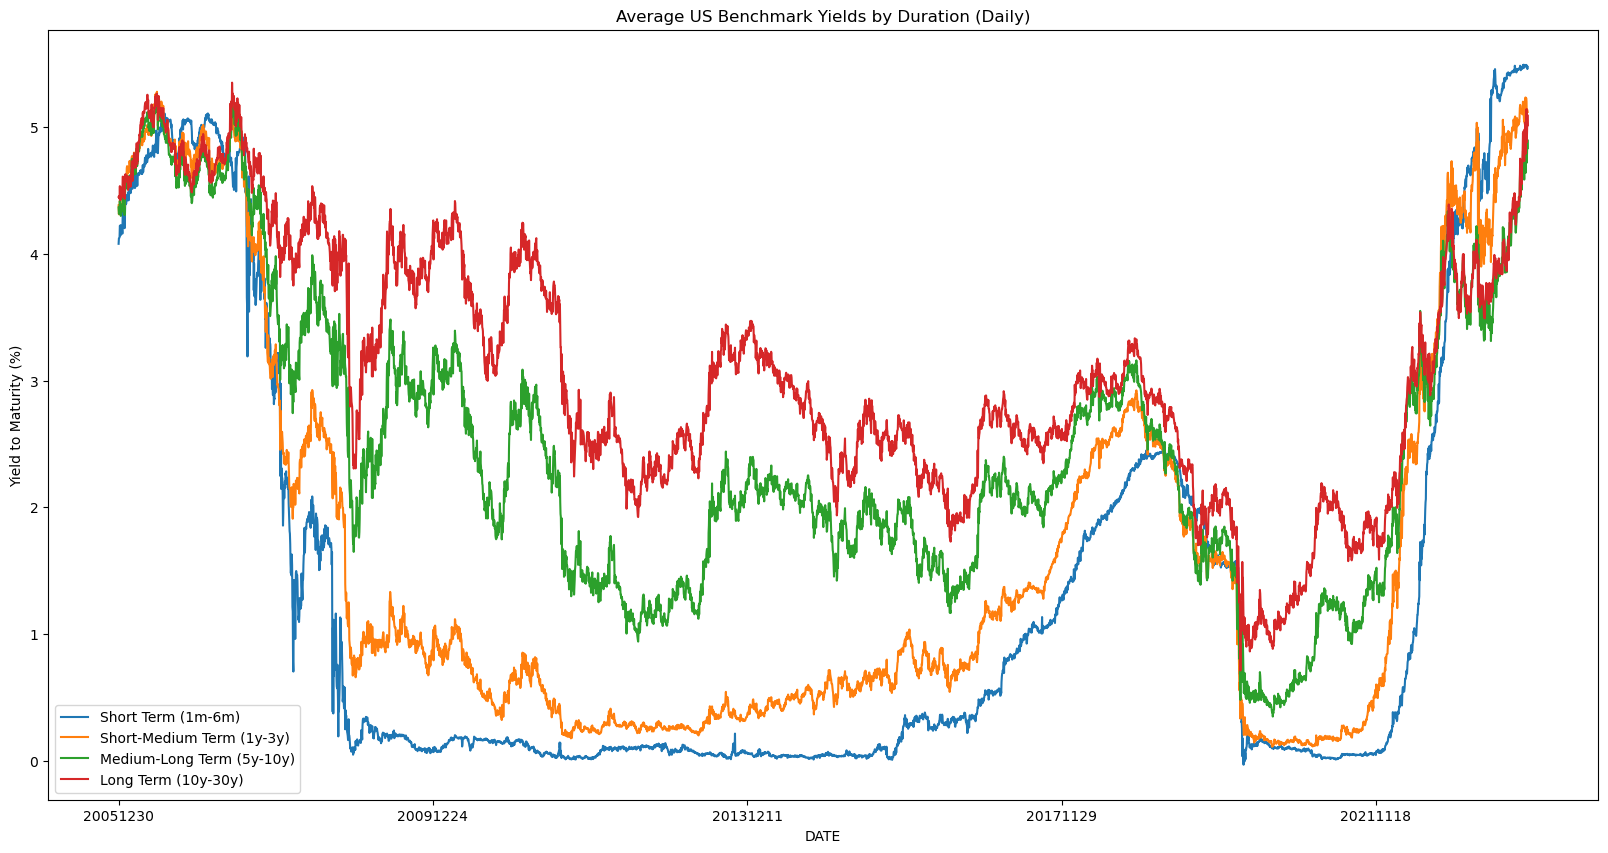

In [7]:
import matplotlib.pyplot as plt

df.iloc[:,-4:].plot(figsize = (20,10))
plt.title('Average US Benchmark Yields by Duration (Daily)')
plt.ylabel('Yield to Maturity (%)')
plt.savefig('us_benchmark_yields.png')
plt.show()